### Analyze repetition parameters

In [6]:
from utils import find_files, read_json
from collections import defaultdict
from matplotlib import pyplot as plt

result_files = find_files("../experiments/outputs/claude-3-5-sonnet-20240620/pilot/**/run1")

repetition_map = {}

for f in result_files:
    results = read_json(f)
    temperature = results["metadata"]["model_args"]["temperature"]
    top_p = results["metadata"]["model_args"]["top_p"]

    for sample in results["data"]:
        if temperature == 0:
            continue
        story = sample["output"]
        if story not in repetition_map:
            repetition_map[story] = {"temperature": defaultdict(int), "top_p": defaultdict(int)}
        repetition_map[story]["temperature"][temperature] += 1
        repetition_map[story]["top_p"][top_p] += 1

# compute temperature distribution
temperature_distribution = {}
for story, counts in repetition_map.items():
    for temperature, count in counts["temperature"].items():
        if temperature not in temperature_distribution:
            temperature_distribution[temperature] = []
        temperature_distribution[temperature].append(count)

# compute top_p distribution
top_p_distribution = {}
for story, counts in repetition_map.items():
    for top_p, count in counts["top_p"].items():
        if top_p not in top_p_distribution:
            top_p_distribution[top_p] = []
        top_p_distribution[top_p].append(count)

In [7]:
temperature_distribution

{0.5: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.9: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 1.0: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.7: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.3: [1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

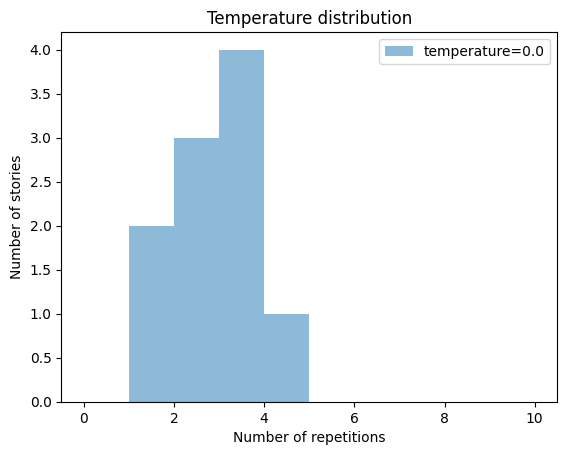

In [3]:
# plot temperature distribution
plt.figure()
# for temperature, counts in temperature_distribution.items():
#     plt.hist(counts, bins=range(0, 11), alpha=0.5, label=f"temperature={temperature}")
plt.hist(temperature_distribution[0.0], bins=range(0, 11), alpha=0.5, label="temperature=0.0")
plt.legend()
plt.title("Temperature distribution")
plt.xlabel("Number of repetitions")
plt.ylabel("Number of stories")
plt.savefig("temperature_distribution.png")

In [8]:
top_p_distribution

{0.9: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.7: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 1.0: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.3: [2, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.5: [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.95: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [16]:
import pandas as pd
from scipy.stats import ttest_ind

claude_results = pd.read_csv("../experiments/reports/pilot/run1_report4/claude-3-5-sonnet-20240620/pilot_claude-3-5-sonnet-20240620_run1_report4_metrics.csv")
gpt4_results = pd.read_csv("../experiments/reports/pilot/run1_report4/gpt-4/pilot_gpt-4_run1_report4_metrics.csv")
gemini_results = pd.read_csv("../experiments/reports/pilot/run1_report4/gemini-1.5-flash/pilot_gemini-1.5-flash_run1_report4_metrics.csv")
llama_results = pd.read_csv("../experiments/reports/pilot/run1_report4/llama-3.1-405b-instruct/pilot_llama-3.1-405b-instruct_run1_report4_metrics.csv")
human_results = pd.read_csv("../experiments/reports/pilot/run1_report4/human/pilot_human_run1_report4_metrics.csv")

stat, p = ttest_ind(claude_results[claude_results["group_id"].str.contains("high")]["metric_novelty"], claude_results[claude_results["group_id"].str.contains("low")]["metric_novelty"], alternative="less")
print(f"model=claude, t={stat}, p={p}")
stat, p = ttest_ind(gpt4_results[gpt4_results["group_id"].str.contains("high")]["metric_novelty"], gpt4_results[gpt4_results["group_id"].str.contains("low")]["metric_novelty"], alternative="less")
print(f"model=gpt4, t={stat}, p={p}")
stat, p = ttest_ind(gemini_results[gemini_results["group_id"].str.contains("high")]["metric_novelty"], gemini_results[gemini_results["group_id"].str.contains("low")]["metric_novelty"], alternative="less")
print(f"model=gemini, t={stat}, p={p}")
stat, p = ttest_ind(llama_results[llama_results["group_id"].str.contains("high")]["metric_novelty"], llama_results[llama_results["group_id"].str.contains("low")]["metric_novelty"], alternative="less")
print(f"model=llama, t={stat}, p={p}")
stat, p = ttest_ind(human_results[human_results["group_id"].str.contains("high")]["metric_novelty"], human_results[human_results["group_id"].str.contains("low")]["metric_novelty"], alternative="less")
print(f"model=human, t={stat}, p={p}")

model=claude, t=-2.962425778664731, p=0.001899061546082097
model=gpt4, t=-3.164084864910932, p=0.001025269792820026
model=gemini, t=-3.3553816998524435, p=0.0005570269268261966
model=llama, t=-3.81469339038951, p=0.00011693281656162677
model=human, t=-2.646819020021025, p=0.0047068741273144764


In [13]:
claude_results[claude_results["group_id"].str.contains("low")]

,result_id,group_id,group_by,metric_length_in_chars,metric_length_in_words,metric_length_in_unique_words,metric_length_in_concepts,metric_length_in_sentences,metric_type_token_ratio,metric_avg_word_length_in_chars,...,metric_avg_pos_noun_ratio,metric_avg_pos_verb_ratio,metric_avg_pos_adj_ratio,metric_avg_pos_adv_ratio,metric_avg_pos_pron_ratio,metric_avg_pos_det_ratio,metric_avg_pos_adp_ratio,metric_inv_homogen,metric_novelty,metric_theme_uniqueness
0,dcdeab7b7c9e,"['claude-3-5-sonnet-20240620', 'low']","['model', 'semantic_distance']",647,108,83,52,5,0.768519,4.879630,...,0.300313,0.114017,0.098917,0.015385,0.096866,0.090940,0.105470,0.108534,0.006428,0.166667
1,2570bf7d4ebe,"['claude-3-5-sonnet-20240620', 'low']","['model', 'semantic_distance']",655,111,84,51,5,0.756757,4.801802,...,0.200531,0.152174,0.081111,0.043333,0.105169,0.114058,0.153865,0.104961,0.003519,0.142857
2,bf3cdaf6438a,"['claude-3-5-sonnet-20240620', 'low']","['model', 'semantic_distance']",625,107,77,48,5,0.719626,4.700935,...,0.253923,0.176874,0.099234,0.000000,0.149761,0.054242,0.073636,0.108964,0.006558,0.100000
3,ab9f68705e40,"['claude-3-5-sonnet-20240620', 'low']","['model', 'semantic_distance']",591,99,78,49,5,0.787879,4.838384,...,0.278563,0.135439,0.096449,0.018254,0.120627,0.070209,0.105606,0.111643,0.006187,0.200000
4,c5aa0bbc8da0,"['claude-3-5-sonnet-20240620', 'low']","['model', 'semantic_distance']",548,93,74,44,5,0.795699,4.741935,...,0.245649,0.150963,0.108983,0.012500,0.133745,0.043377,0.077186,0.113348,0.008879,0.100000
5,4d1708e8a2d6,"['claude-3-5-sonnet-20240620', 'low']","['model', 'semantic_distance']",811,136,86,60,5,0.632353,4.875000,...,0.227820,0.140127,0.095039,0.042285,0.131019,0.115134,0.118116,0.105295,0.007116,0.200000
6,c945059334a8,"['claude-3-5-sonnet-20240620', 'low']","['model', 'semantic_distance']",600,105,79,48,5,0.752381,4.590476,...,0.250525,0.162198,0.086178,0.018803,0.126178,0.052601,0.095067,0.116751,0.009530,0.100000
7,a07b9c085fec,"['claude-3-5-sonnet-20240620', 'low']","['model', 'semantic_distance']",645,110,83,55,5,0.754545,4.763636,...,0.276364,0.151705,0.065341,0.026250,0.127273,0.063182,0.136932,0.114343,0.004488,0.200000
8,66873f027e92,"['claude-3-5-sonnet-20240620', 'low']","['model', 'semantic_distance']",867,143,96,65,5,0.671329,4.979021,...,0.262981,0.127476,0.082706,0.046574,0.115095,0.108976,0.135957,0.113267,0.000351,0.090909
9,ced45fdab836,"['claude-3-5-sonnet-20240620', 'low']","['model', 'semantic_distance']",883,149,99,69,5,0.664430,4.838926,...,0.249444,0.132454,0.120787,0.029583,0.137546,0.108056,0.116898,0.105441,0.004691,0.090909
